<a href="https://colab.research.google.com/github/hongqin/Use-R-in-CoLab/blob/master/Learn_R_through_analysis_of_Covid19_in_CoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome
This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Hong Qin <br>
Started on September 18, 2020. <br>
This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/Use-R-in-CoLab/blob/master/Learn_R_through_analysis_of_Covid19_in_CoLab.ipynb 

More tutorials at http://YouTube.com/hongqin

# Warm up exercises

## Load libries

In [ ]:
install.packages('reshape2')
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Simple calculator

In [ ]:
2 + 4
pi
log10(pi)

[1] 6

[1] 3.141593

[1] 0.4971499

## Plots

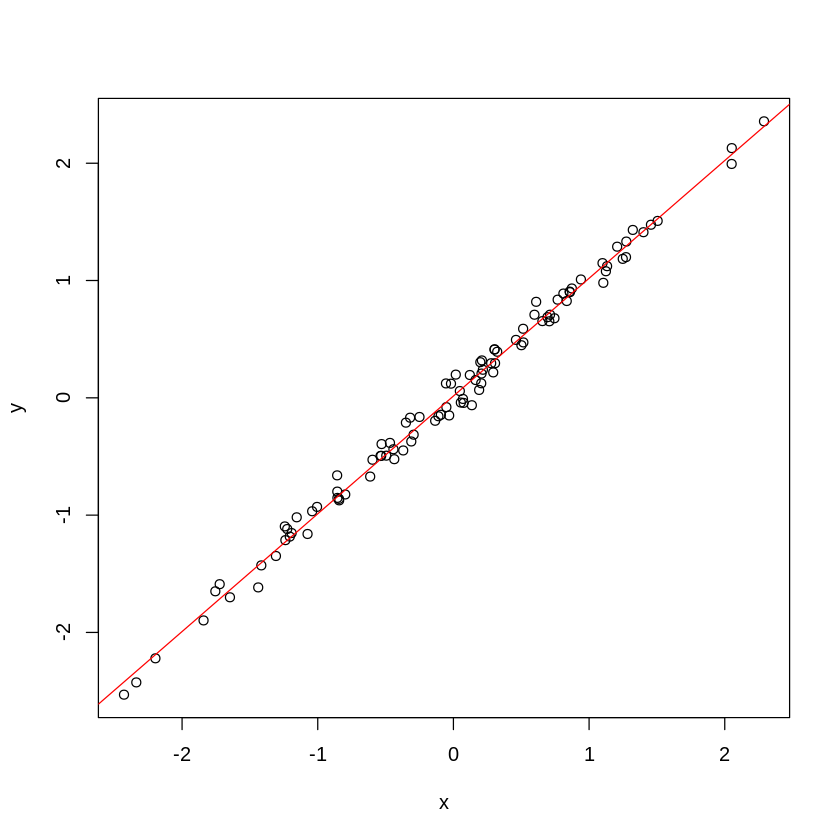

In [ ]:
x = rnorm(100)
y = x + rnorm(100)/10
m = lm( y ~ x)
plot( y ~ x)
abline(m, col='red')

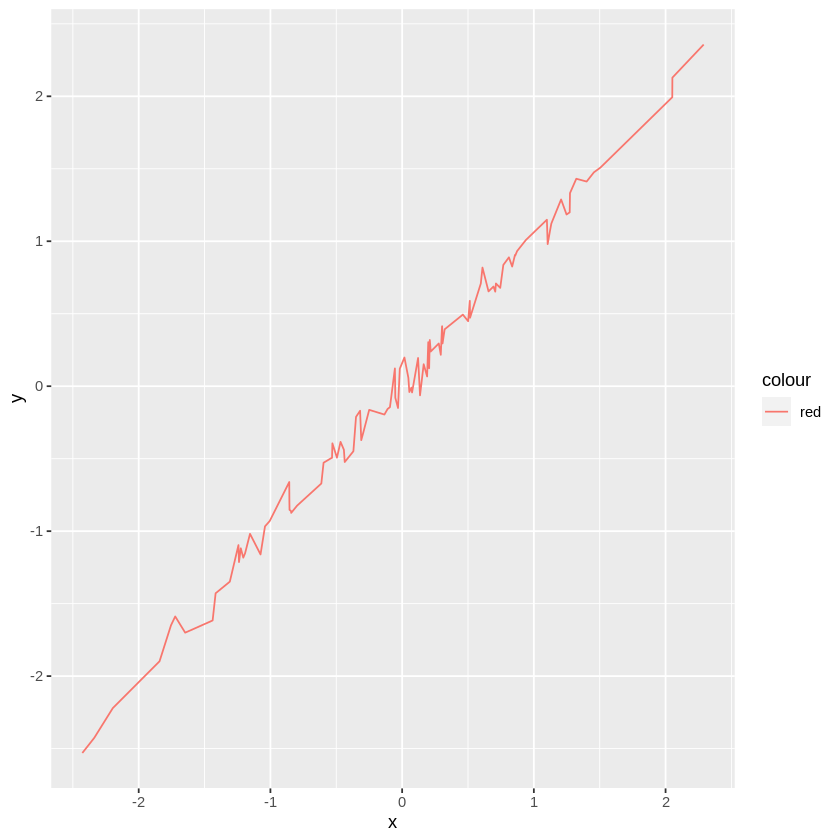

In [ ]:
mydata = tibble(cbind(x,y))
ggplot(mydata, aes(x=x, y=y, col="red")) + geom_line()

## Looking for helps

In [ ]:
?date

In [ ]:
help(read_csv)

# Part 1, Explore the county-level data


We will go through basic R by exploring the Covid19 data set curated by the Johns Hopkins University. 




In [ ]:

library(tidyverse)
library(ggplot2)
library(dplyr)

## Load data into DataFrames

In [ ]:
# load JHU covid19 data set with tidyverse read_csv
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,4781,4800,4812,5003,5021,5033,5047,5061,5087,5124
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,622,626,629,809,809,824,830,835,838,848
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,578,581,580,612,617,619,628,632,636,635
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,1121,1128,1139,1487,1504,1527,1542,1551,1560,1573
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,558,558,558,583,585,585,585,587,591,593


## Pick rows, columns, and cells in DataFrames

In [ ]:
# pick first row
tb[1,] 

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714


In [ ]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID
<dbl>
84001001
84001003
84001005
84001007
84001009
84001011
84001013
84001015
84001017


In [ ]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,"Autauga, Alabama, US",0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,"Baldwin, Alabama, US",0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,"Barbour, Alabama, US",0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,"Bibb, Alabama, US",0
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,"Blount, Alabama, US",0


In [ ]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 256

[1] "There are  256  columns"


In [ ]:
# view the first 5 rows in all data columns
tb[1:5 , 12:length(tb[1,])  ]

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714
0,0,0,0,0,0,0,0,0,0,⋯,4781,4800,4812,5003,5021,5033,5047,5061,5087,5124
0,0,0,0,0,0,0,0,0,0,⋯,622,626,629,809,809,824,830,835,838,848
0,0,0,0,0,0,0,0,0,0,⋯,578,581,580,612,617,619,628,632,636,635
0,0,0,0,0,0,0,0,0,0,⋯,1121,1128,1139,1487,1504,1527,1542,1551,1560,1573


## Select columns of daily cases

In [ ]:
tb %>% dplyr::select( 12:length(tb[1,]) )


1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714
0,0,0,0,0,0,0,0,0,0,⋯,4781,4800,4812,5003,5021,5033,5047,5061,5087,5124
0,0,0,0,0,0,0,0,0,0,⋯,622,626,629,809,809,824,830,835,838,848
0,0,0,0,0,0,0,0,0,0,⋯,578,581,580,612,617,619,628,632,636,635
0,0,0,0,0,0,0,0,0,0,⋯,1121,1128,1139,1487,1504,1527,1542,1551,1560,1573
0,0,0,0,0,0,0,0,0,0,⋯,558,558,558,583,585,585,585,587,591,593
0,0,0,0,0,0,0,0,0,0,⋯,866,867,868,901,902,906,908,909,911,911
0,0,0,0,0,0,0,0,0,0,⋯,2773,2790,2804,3165,3211,3249,3320,3338,3374,3390
0,0,0,0,0,0,0,0,0,0,⋯,863,864,865,1107,1106,1117,1123,1130,1132,1140


## Convert daily cases into rows

In [ ]:
# this is fast but a bit un-intuitive
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))
head(tb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
#this is very slow due to installation
#install.packages('data.table')
##library(data.table)
#tb1b <- tb %>% select(12:length(tb[1,])) %>% transpose()
#tb1b

## Add meaning columns names

In [ ]:
names(tb1) = tb$Combined_Key
head(tb1[100:110,1:10])

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/30/20,44,174,39,42,37,13,53,94,295,15
5/1/20,42,175,42,42,39,14,65,93,290,15
5/2/20,45,181,43,42,40,14,92,98,294,15
5/3/20,48,187,45,43,40,14,105,105,300,16
5/4/20,53,188,45,42,40,16,114,105,302,16
5/5/20,53,189,47,43,40,18,120,114,304,17


## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [ ]:
library(lubridate)
date("8/9/2020")

[1] "8-09-20"

In [ ]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20" "1/23/20" "1/24/20" "1/25/20" "1/26/20" "1/27/20" "1/28/20"
  [8] "1/29/20" "1/30/20" "1/31/20" "2/1/20"  "2/2/20"  "2/3/20"  "2/4/20" 
 [15] "2/5/20"  "2/6/20"  "2/7/20"  "2/8/20"  "2/9/20"  "2/10/20" "2/11/20"
 [22] "2/12/20" "2/13/20" "2/14/20" "2/15/20" "2/16/20" "2/17/20" "2/18/20"
 [29] "2/19/20" "2/20/20" "2/21/20" "2/22/20" "2/23/20" "2/24/20" "2/25/20"
 [36] "2/26/20" "2/27/20" "2/28/20" "2/29/20" "3/1/20"  "3/2/20"  "3/3/20" 
 [43] "3/4/20"  "3/5/20"  "3/6/20"  "3/7/20"  "3/8/20"  "3/9/20"  "3/10/20"
 [50] "3/11/20" "3/12/20" "3/13/20" "3/14/20" "3/15/20" "3/16/20" "3/17/20"
 [57] "3/18/20" "3/19/20" "3/20/20" "3/21/20" "3/22/20" "3/23/20" "3/24/20"
 [64] "3/25/20" "3/26/20" "3/27/20" "3/28/20" "3/29/20" "3/30/20" "3/31/20"
 [71] "4/1/20"  "4/2/20"  "4/3/20"  "4/4/20"  "4/5/20"  "4/6/20"  "4/7/20" 
 [78] "4/8/20"  "4/9/20"  "4/10/20" "4/11/20" "4/12/20" "4/13/20" "4/14/20"
 [85] "4/15/20" "4/16/20" "4/17/20" "4/18/20" "4/19/20" "4/20/20" "4/21/20"
 [92] "4/22/20" "4/23/20" "4/24/20" "4/25/20" "4/26/20" "4/27/20" "4/28/20"
 [99] "4/29/20" "4/30/20" "5/1/20"  "5/2/20"  "5/3/20"  "5/4/20"  "5/5/20" 
[106] "5/6/20"  "5/7/20"  "5/8/20"  "5/9/20"  "5/10/20" "5/11/20" "5/12/20"
[113] "5/13/20" "5/14/20" "5/15/20" "5/16/20" "5/17/20" "5/18/20" "5/19/20"
[120] "5/20/20" "5/21/20" "5/22/20" "5/23/20" "5/24/20" "5/25/20" "5/26/20"
[127] "5/27/20" "5/28/20" "5/29/20" "5/30/20" "5/31/20" "6/1/20"  "6/2/20" 
[134] "6/3/20"  "6/4/20"  "6/5/20"  "6/6/20"  "6/7/20"  "6/8/20"  "6/9/20" 
[141] "6/10/20" "6/11/20" "6/12/20" "6/13/20" "6/14/20" "6/15/20" "6/16/20"
[148] "6/17/20" "6/18/20" "6/19/20" "6/20/20" "6/21/20" "6/22/20" "6/23/20"
[155] "6/24/20" "6/25/20" "6/26/20" "6/27/20" "6/28/20" "6/29/20" "6/30/20"
[162] "7/1/20"  "7/2/20"  "7/3/20"  "7/4/20"  "7/5/20"  "7/6/20"  "7/7/20" 
[169] "7/8/20"  "7/9/20"  "7/10/20" "7/11/20" "7/12/20" "7/13/20" "7/14/20"
[176] "7/15/20" "7/16/20" "7/17/20" "7/18/20" "7/19/20" "7/20/20" "7/21/20"
[183] "7/22/20" "7/23/20" "7/24/20" "7/25/20" "7/26/20" "7/27/20" "7/28/20"
[190] "7/29/20" "7/30/20" "7/31/20" "8/1/20"  "8/2/20"  "8/3/20"  "8/4/20" 
[197] "8/5/20"  "8/6/20"  "8/7/20"  "8/8/20"  "8/9/20"  "8/10/20" "8/11/20"
[204] "8/12/20" "8/13/20" "8/14/20" "8/15/20" "8/16/20" "8/17/20" "8/18/20"
[211] "8/19/20" "8/20/20" "8/21/20" "8/22/20" "8/23/20" "8/24/20" "8/25/20"
[218] "8/26/20" "8/27/20" "8/28/20" "8/29/20" "8/30/20" "8/31/20" "9/1/20" 
[225] "9/2/20"  "9/3/20"  "9/4/20"  "9/5/20"  "9/6/20"  "9/7/20"  "9/8/20" 
[232] "9/9/20"  "9/10/20" "9/11/20" "9/12/20" "9/13/20" "9/14/20" "9/15/20"
[239] "9/16/20" "9/17/20" "9/18/20" "9/19/20" "9/20/20" "9/21/20" "9/22/20"

In [ ]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [ ]:
tb1$dates = mdy(current_dates)
head(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-22
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-23
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-24
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-25
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-26
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-27


## Select a time window

In [ ]:
tb1 %>% filter( dates > mdy("5/1/2020"), dates < mdy("5/31/20")) %>% head()

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
5/2/20,45,181,43,42,40,14,92,98,294,15,⋯,0,16,3,18,97,8,0,8,0,2020-05-02
5/3/20,48,187,45,43,40,14,105,105,300,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-03
5/4/20,53,188,45,42,40,16,114,105,302,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-04
5/5/20,53,189,47,43,40,18,120,114,304,17,⋯,0,16,3,18,98,8,0,8,0,2020-05-05
5/6/20,58,196,47,43,42,18,130,114,306,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-06
5/7/20,61,205,51,44,44,18,155,120,308,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-07


In [ ]:
start = mdy("8/1/20")
start + ddays(14)

[1] "2020-08-15"

In [ ]:
tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select(1:5)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8/1/20,988,3095,554,360,704
8/2/20,1010,3175,562,364,722
8/3/20,1024,3210,563,374,736
8/4/20,1030,3263,563,381,741
8/5/20,1030,3322,564,384,745
8/6/20,1050,3380,565,413,759
8/7/20,1065,3443,569,416,774
8/8/20,1086,3502,573,426,788
8/9/20,1169,3544,575,438,800


## Plot a time window

In [ ]:
tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
8/1/20,988,3095,554,360,704,2020-08-01
8/2/20,1010,3175,562,364,722,2020-08-02
8/3/20,1024,3210,563,374,736,2020-08-03
8/4/20,1030,3263,563,381,741,2020-08-04
8/5/20,1030,3322,564,384,745,2020-08-05
8/6/20,1050,3380,565,413,759,2020-08-06
8/7/20,1065,3443,569,416,774,2020-08-07
8/8/20,1086,3502,573,426,788,2020-08-08
8/9/20,1169,3544,575,438,800,2020-08-09


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



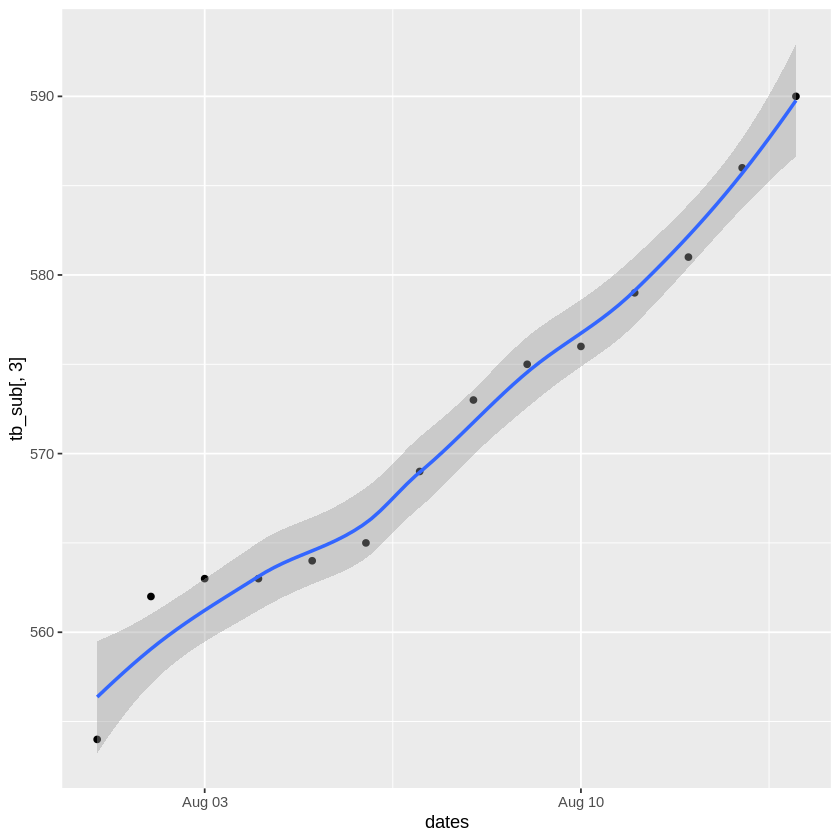

In [ ]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

### Now, let's look a specific county. 
How about Hamilton, Tennessee, US?

There are many Hamilton counties in the USA

In [ ]:
names(tb1)[ grep("Hamilton", colnames(tb1))]

[1] "Hamilton, Florida, US"   "Hamilton, Illinois, US" 
 [3] "Hamilton, Indiana, US"   "Hamilton, Iowa, US"     
 [5] "Hamilton, Kansas, US"    "Hamilton, Nebraska, US" 
 [7] "Hamilton, New York, US"  "Hamilton, Ohio, US"     
 [9] "Hamilton, Tennessee, US" "Hamilton, Texas, US"

In [ ]:
print(paste("There are ", length(names(tb1)[ grep("Hamilton", colnames(tb1))] ), " Hamilton counties in the USA"))

[1] "There are  10  Hamilton counties in the USA"


In [ ]:
tb1 %>% dplyr::select ( c('Hamilton, Tennessee, US', 'dates'))

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
1/22/20,0,2020-01-22
1/23/20,0,2020-01-23
1/24/20,0,2020-01-24
1/25/20,0,2020-01-25
1/26/20,0,2020-01-26
1/27/20,0,2020-01-27
1/28/20,0,2020-01-28
1/29/20,0,2020-01-29
1/30/20,0,2020-01-30


In [ ]:
tb_HCTN <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, mdy('5/1/20'), mdy('9/17/20')))

head(tb_HCTN)

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
5/1/20,160,2020-05-01
5/2/20,168,2020-05-02
5/3/20,172,2020-05-03
5/4/20,180,2020-05-04
5/5/20,184,2020-05-05
5/6/20,196,2020-05-06


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



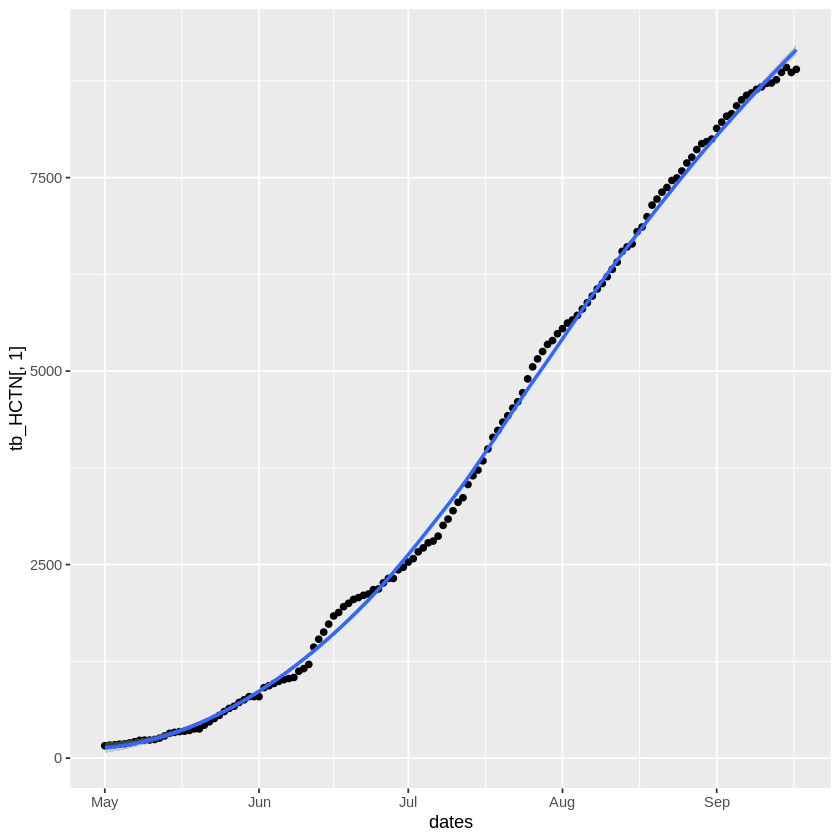

In [ ]:
ggplot(tb_HCTN, aes( x = dates, y=tb_HCTN[,1])) + geom_point() + geom_smooth()

## Multiple column plot
How to compare different counties?

In [ ]:
names(tb1)[ grep("Tennessee", colnames(tb1))]

[1] "Anderson, Tennessee, US"   "Bedford, Tennessee, US"   
 [3] "Benton, Tennessee, US"     "Bledsoe, Tennessee, US"   
 [5] "Blount, Tennessee, US"     "Bradley, Tennessee, US"   
 [7] "Campbell, Tennessee, US"   "Cannon, Tennessee, US"    
 [9] "Carroll, Tennessee, US"    "Carter, Tennessee, US"    
[11] "Cheatham, Tennessee, US"   "Chester, Tennessee, US"   
[13] "Claiborne, Tennessee, US"  "Clay, Tennessee, US"      
[15] "Cocke, Tennessee, US"      "Coffee, Tennessee, US"    
[17] "Crockett, Tennessee, US"   "Cumberland, Tennessee, US"
[19] "Davidson, Tennessee, US"   "DeKalb,Tennessee,US"      
[21] "Decatur, Tennessee, US"    "Dickson, Tennessee, US"   
[23] "Dyer, Tennessee, US"       "Fayette, Tennessee, US"   
[25] "Fentress, Tennessee, US"   "Franklin, Tennessee, US"  
[27] "Gibson, Tennessee, US"     "Giles, Tennessee, US"     
[29] "Grainger, Tennessee, US"   "Greene, Tennessee, US"    
[31] "Grundy, Tennessee, US"     "Hamblen, Tennessee, US"   
[33] "Hamilton, Tennessee, US"   "Hancock, Tennessee, US"   
[35] "Hardeman, Tennessee, US"   "Hardin, Tennessee, US"    
[37] "Hawkins, Tennessee, US"    "Haywood, Tennessee, US"   
[39] "Henderson, Tennessee, US"  "Henry, Tennessee, US"     
[41] "Hickman, Tennessee, US"    "Houston, Tennessee, US"   
[43] "Humphreys, Tennessee, US"  "Jackson, Tennessee, US"   
[45] "Jefferson, Tennessee, US"  "Johnson, Tennessee, US"   
[47] "Knox, Tennessee, US"       "Lake, Tennessee, US"      
[49] "Lauderdale, Tennessee, US" "Lawrence, Tennessee, US"  
[51] "Lewis, Tennessee, US"      "Lincoln, Tennessee, US"   
[53] "Loudon, Tennessee, US"     "Macon, Tennessee, US"     
[55] "Madison, Tennessee, US"    "Marion, Tennessee, US"    
[57] "Marshall, Tennessee, US"   "Maury, Tennessee, US"     
[59] "McMinn, Tennessee, US"     "McNairy, Tennessee, US"   
[61] "Meigs, Tennessee, US"      "Monroe, Tennessee, US"    
[63] "Montgomery, Tennessee, US" "Moore, Tennessee, US"     
[65] "Morgan, Tennessee, US"     "Obion, Tennessee, US"     
[67] "Out of TN, Tennessee, US"  "Overton, Tennessee, US"   
[69] "Perry, Tennessee, US"      "Pickett, Tennessee, US"   
[71] "Polk, Tennessee, US"       "Putnam, Tennessee, US"    
[73] "Rhea, Tennessee, US"       "Roane, Tennessee, US"     
[75] "Robertson, Tennessee, US"  "Rutherford, Tennessee, US"
[77] "Scott, Tennessee, US"      "Sequatchie, Tennessee, US"
[79] "Sevier, Tennessee, US"     "Shelby, Tennessee, US"    
[81] "Smith, Tennessee, US"      "Stewart, Tennessee, US"   
[83] "Sullivan, Tennessee, US"   "Sumner, Tennessee, US"    
[85] "Tipton, Tennessee, US"     "Trousdale, Tennessee, US" 
[87] "Unassigned, Tennessee, US" "Unicoi, Tennessee, US"    
[89] "Union, Tennessee, US"      "Van Buren, Tennessee, US" 
[91] "Warren, Tennessee, US"     "Washington, Tennessee, US"
[93] "Wayne, Tennessee, US"      "Weakley, Tennessee, US"   
[95] "White, Tennessee, US"      "Williamson, Tennessee, US"
[97] "Wilson, Tennessee, US"

In [ ]:
print(paste("There are ", length( names(tb1)[ grep("Tennessee", colnames(tb1))])  ," counties in Tennessee. Really?"))

[1] "There are  97  counties in Tennessee. Really?"


In [ ]:
mycounties = c( 'Hamilton, Tennessee, US', 'Knox, Tennessee, US')

days_window = 90 #90-day window
endday = '9/18/20'

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, mdy(endday)-ddays(days_window), mdy(endday)))   

head(tb_sub)


,"Hamilton, Tennessee, US","Knox, Tennessee, US",dates
,<dbl>,<dbl>,<date>
6/20/20,2050,638,2020-06-20
6/21/20,2074,656,2020-06-21
6/22/20,2103,693,2020-06-22
6/23/20,2120,716,2020-06-23
6/24/20,2176,740,2020-06-24
6/25/20,2185,783,2020-06-25


In [ ]:
library(reshape2)
df_tmp <- melt(tb_sub, measure.vars = mycounties, value.name = 'DailyCases', variable.name = 'Counties')
head(df_tmp)

,dates,Counties,DailyCases
,<date>,<fct>,<dbl>
1,2020-06-20,"Hamilton, Tennessee, US",2050
2,2020-06-21,"Hamilton, Tennessee, US",2074
3,2020-06-22,"Hamilton, Tennessee, US",2103
4,2020-06-23,"Hamilton, Tennessee, US",2120
5,2020-06-24,"Hamilton, Tennessee, US",2176
6,2020-06-25,"Hamilton, Tennessee, US",2185


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



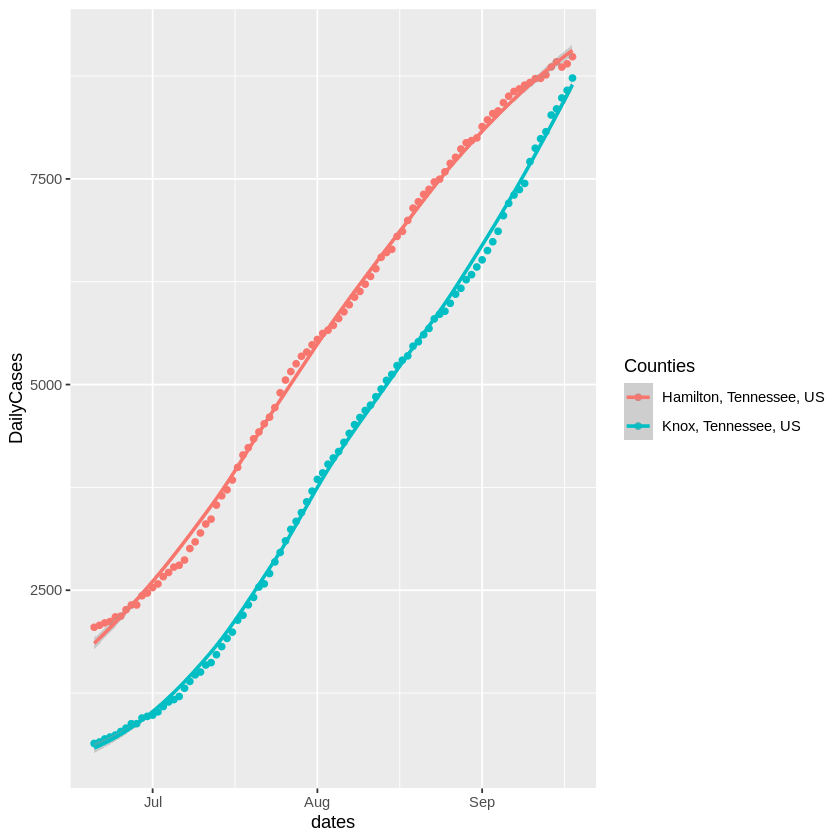

In [ ]:
ggplot( df_tmp, aes(x=dates, y=DailyCases, color=Counties) ) + geom_point() + geom_smooth()

# Part 2, Explore the state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [ ]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,4781,4800,4812,5003,5021,5033,5047,5061,5087,5124
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,622,626,629,809,809,824,830,835,838,848
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,578,581,580,612,617,619,628,632,636,635
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,1121,1128,1139,1487,1504,1527,1542,1551,1560,1573
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,558,558,558,583,585,585,585,587,591,593


In [ ]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

tb2

Province_State,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,⋯,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,0,0,0,0,0,0,0,0,0,⋯,138755,139459,140160,141087,141757,142863,144164,144962,145780,146584
Alaska,0,0,0,0,0,0,0,0,0,⋯,6268,6343,6384,6432,6537,6644,6729,6822,6892,6936
American Samoa,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Arizona,1,1,1,1,1,1,2,4,4,⋯,208512,208725,209209,209907,211660,212942,213551,214021,214251,214846
Arkansas,0,0,0,0,0,0,0,0,0,⋯,70219,70627,71497,72219,73211,74082,75160,75723,76364,76981
California,12,12,21,25,35,51,59,81,95,⋯,761728,765134,768204,771321,775037,779491,783313,786168,790096,793065
Colorado,0,0,0,0,0,2,8,8,8,⋯,61293,61667,62079,62666,63125,63730,64336,64837,65379,66033
Connecticut,0,0,0,0,0,0,0,0,0,⋯,54326,54895,55031,55166,55386,55527,55527,55527,56024,56160
Delaware,0,0,0,0,0,0,0,0,0,⋯,18849,18937,19137,19234,19318,19366,19449,19566,19667,19761


## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [ ]:
? apply

In [ ]:
? diff

In [ ]:
x = data.frame(1:10)
apply(x, 2, diff)

X1.10
1
1
1
1
1
1
1
1
1


In [ ]:
y = data.frame(10:1)
apply(y, 2, diff)

X10.1
-1
-1
-1
-1
-1
-1
-1
-1
-1


### Now, process a small data set to verify the results

In [ ]:
test = tb2[1:5, 10:20]
test

3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,5,7,11,29,39,51
0,0,0,0,0,1,1,1,1,3,5
0,0,0,0,0,0,0,0,0,0,0
4,4,6,9,9,9,12,12,18,20,27
0,0,0,0,0,9,12,3,3,3,4


In [ ]:
apply( test, 1, diff)

3/9/20,0,0,0,0,0
3/10/20,0,0,0,2,0
3/11/20,0,0,0,3,0
3/12/20,0,0,0,0,0
3/13/20,5,1,0,0,9
3/14/20,2,0,0,3,3
3/15/20,4,0,0,0,-9
3/16/20,18,0,0,6,0
3/17/20,10,2,0,2,0
3/18/20,12,2,0,7,1


### Now, we are comfortable to apply our method to the entire data set. 

In [ ]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,4,0,0,0
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,0,7,0,0,0
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,0,9,0,0,0
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,0,12,0,0,0
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,1,3,0,0,0,0,31,0,0,0
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,0,1,0,0,0,0,8,0,0,0


## Add states names as columns names

Current names are not informative

In [ ]:
names(tb3)

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18" "X19" "X20" "X21" "X22" "X23" "X24"
[25] "X25" "X26" "X27" "X28" "X29" "X30" "X31" "X32" "X33" "X34" "X35" "X36"
[37] "X37" "X38" "X39" "X40" "X41" "X42" "X43" "X44" "X45" "X46" "X47" "X48"
[49] "X49" "X50" "X51" "X52" "X53" "X54" "X55" "X56" "X57" "X58"

Information of States will be more relevant.

In [ ]:
tb2$Province_State

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"

Assign the columns names with the State-names

In [ ]:
names(tb3) = tb2$Province_State
head(tb3)

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,⋯,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,4,0,0,0
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,0,7,0,0,0
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,0,9,0,0,0
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,0,12,0,0,0
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,1,3,0,0,0,0,31,0,0,0
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,0,1,0,0,0,0,8,0,0,0


## Convert date-text to Date type

In [ ]:
row.names(tb3)

[1] "3/1/20"  "3/2/20"  "3/3/20"  "3/4/20"  "3/5/20"  "3/6/20"  "3/7/20" 
  [8] "3/8/20"  "3/9/20"  "3/10/20" "3/11/20" "3/12/20" "3/13/20" "3/14/20"
 [15] "3/15/20" "3/16/20" "3/17/20" "3/18/20" "3/19/20" "3/20/20" "3/21/20"
 [22] "3/22/20" "3/23/20" "3/24/20" "3/25/20" "3/26/20" "3/27/20" "3/28/20"
 [29] "3/29/20" "3/30/20" "3/31/20" "4/1/20"  "4/2/20"  "4/3/20"  "4/4/20" 
 [36] "4/5/20"  "4/6/20"  "4/7/20"  "4/8/20"  "4/9/20"  "4/10/20" "4/11/20"
 [43] "4/12/20" "4/13/20" "4/14/20" "4/15/20" "4/16/20" "4/17/20" "4/18/20"
 [50] "4/19/20" "4/20/20" "4/21/20" "4/22/20" "4/23/20" "4/24/20" "4/25/20"
 [57] "4/26/20" "4/27/20" "4/28/20" "4/29/20" "4/30/20" "5/1/20"  "5/2/20" 
 [64] "5/3/20"  "5/4/20"  "5/5/20"  "5/6/20"  "5/7/20"  "5/8/20"  "5/9/20" 
 [71] "5/10/20" "5/11/20" "5/12/20" "5/13/20" "5/14/20" "5/15/20" "5/16/20"
 [78] "5/17/20" "5/18/20" "5/19/20" "5/20/20" "5/21/20" "5/22/20" "5/23/20"
 [85] "5/24/20" "5/25/20" "5/26/20" "5/27/20" "5/28/20" "5/29/20" "5/30/20"
 [92] "5/31/20" "6/1/20"  "6/2/20"  "6/3/20"  "6/4/20"  "6/5/20"  "6/6/20" 
 [99] "6/7/20"  "6/8/20"  "6/9/20"  "6/10/20" "6/11/20" "6/12/20" "6/13/20"
[106] "6/14/20" "6/15/20" "6/16/20" "6/17/20" "6/18/20" "6/19/20" "6/20/20"
[113] "6/21/20" "6/22/20" "6/23/20" "6/24/20" "6/25/20" "6/26/20" "6/27/20"
[120] "6/28/20" "6/29/20" "6/30/20" "7/1/20"  "7/2/20"  "7/3/20"  "7/4/20" 
[127] "7/5/20"  "7/6/20"  "7/7/20"  "7/8/20"  "7/9/20"  "7/10/20" "7/11/20"
[134] "7/12/20" "7/13/20" "7/14/20" "7/15/20" "7/16/20" "7/17/20" "7/18/20"
[141] "7/19/20" "7/20/20" "7/21/20" "7/22/20" "7/23/20" "7/24/20" "7/25/20"
[148] "7/26/20" "7/27/20" "7/28/20" "7/29/20" "7/30/20" "7/31/20" "8/1/20" 
[155] "8/2/20"  "8/3/20"  "8/4/20"  "8/5/20"  "8/6/20"  "8/7/20"  "8/8/20" 
[162] "8/9/20"  "8/10/20" "8/11/20" "8/12/20" "8/13/20" "8/14/20" "8/15/20"
[169] "8/16/20" "8/17/20" "8/18/20" "8/19/20" "8/20/20" "8/21/20" "8/22/20"
[176] "8/23/20" "8/24/20" "8/25/20" "8/26/20" "8/27/20" "8/28/20" "8/29/20"
[183] "8/30/20" "8/31/20" "9/1/20"  "9/2/20"  "9/3/20"  "9/4/20"  "9/5/20" 
[190] "9/6/20"  "9/7/20"  "9/8/20"  "9/9/20"  "9/10/20" "9/11/20" "9/12/20"
[197] "9/13/20" "9/14/20" "9/15/20" "9/16/20" "9/17/20" "9/18/20" "9/19/20"
[204] "9/20/20" "9/21/20" "9/22/20"

In [ ]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,⋯,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,4,0,0,0,2020-03-01
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,7,0,0,0,2020-03-02
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,9,0,0,0,2020-03-03
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,12,0,0,0,2020-03-04
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,3,0,0,0,0,31,0,0,0,2020-03-05
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,1,0,0,0,0,8,0,0,0,2020-03-06


## Plot

In [ ]:
tb3[,2]

[1]   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   2   2
 [19]   3   3   2   5  12   4   7  15   2  27  17  12   5  13  11  14  14  14
 [37]   5  23  13   9  11  11  15   5   8   8   7   9   5   5   2   8   6   2
 [55]   2   0   1   5   6   4   0   9   1   3   2   1   1   2   3   1   1   0
 [73]   4   0   0   5   0   0   0  12   1   0   2   4   0   1   2   1  13   5
 [91]   4  26   7  20  18   8  11  12   8  19  10  20  17  15  29   7   3  12
[109]  20  12  13  21  11   6   2  29  24  20  18  29  21  36  38  39  46  47
[127]  27  28  18  42  46  55  62  94  60  40  52  62  41  62  79  75  92  89
[145]  62  56  90 186  98 107  68  81 111 146 144  61  53  54  35  53  77  98
[163]  63  45  60  84 110  83 103  50  62  67  82  68  89  64  69  33  52  79
[181] 118  90  44  37  34  65 102 120  93  83  33  35  63 121  92 103  61  75
[199]  41  48 105 107  85  93  70  44

### A line plot

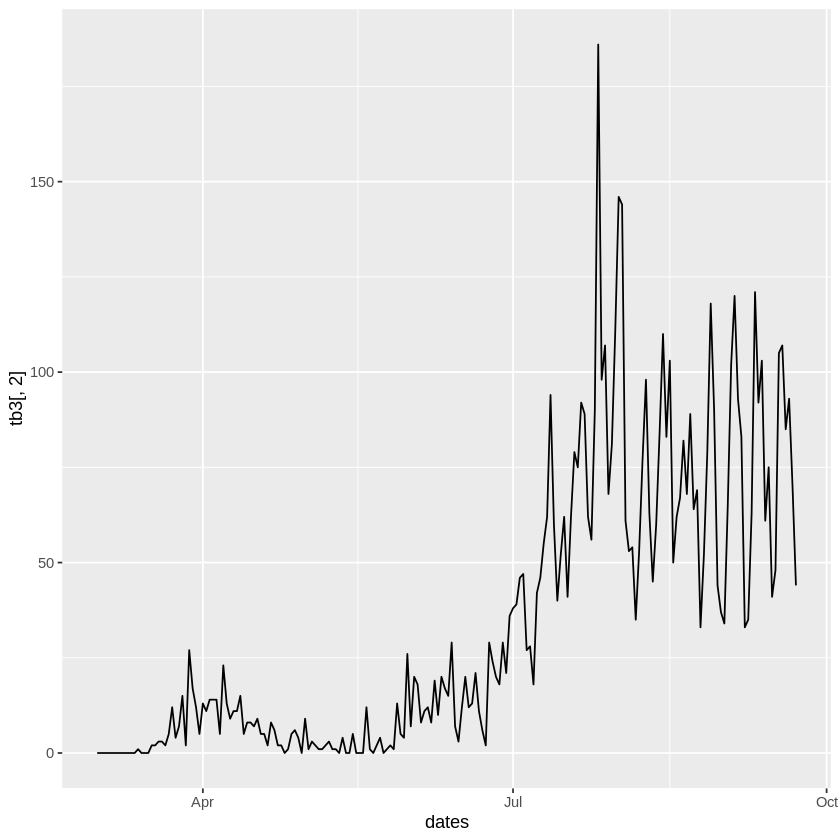

In [ ]:
ggplot(tb3, aes(x=dates, y=tb3[,2])) + geom_line()


### A scatter plot with smoothing trend

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



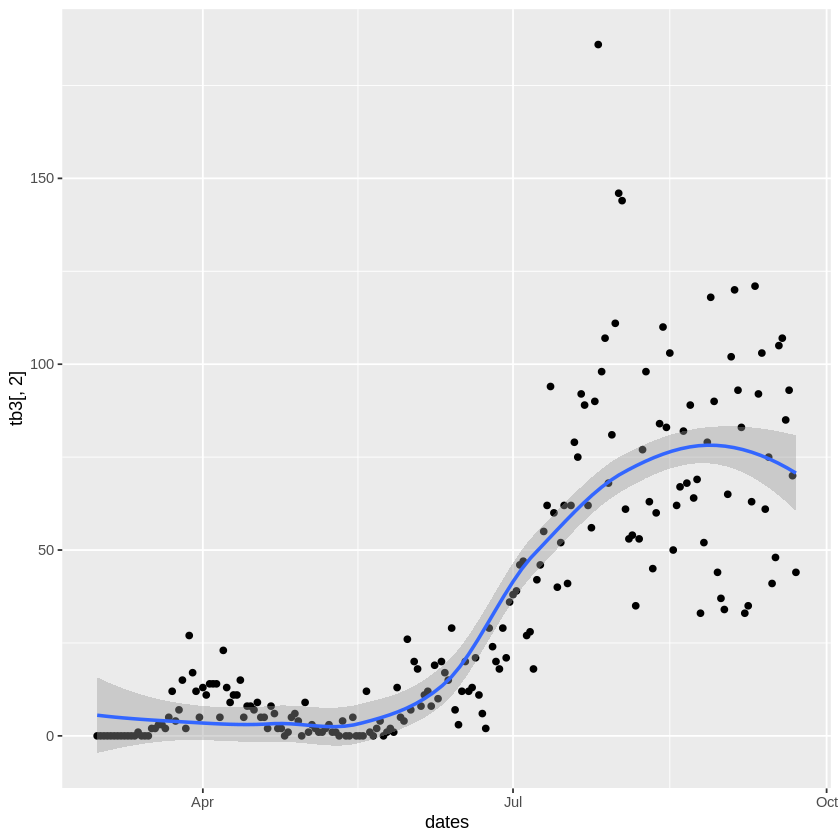

In [ ]:
ggplot(tb3, aes(x=dates, y=tb3[,2])) + geom_point() + geom_smooth()


### Plot for a time-window

In [ ]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

[1] "2020-09-22"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



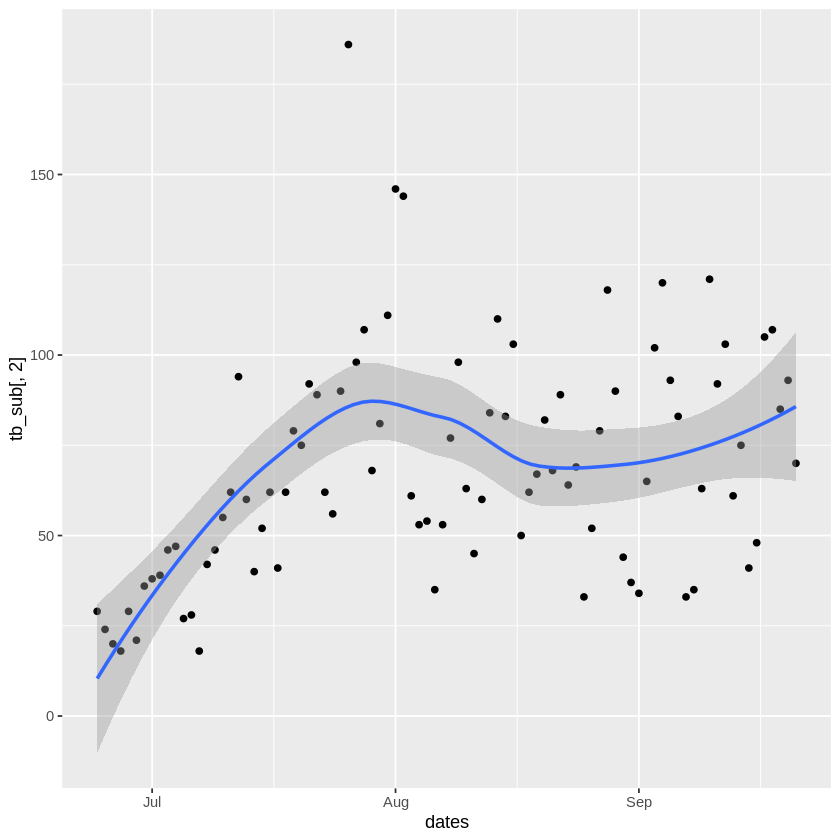

In [ ]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=tb_sub[,2])) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [ ]:
names(tb3)

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"                 
[59] "dates"

In [ ]:
days_window = 90 #90-day window
endday = '9/18/20'

tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, mdy(endday)-ddays(days_window), mdy(endday))) 

,Tennessee,dates
,<dbl>,<date>
6/20/20,429,2020-06-20
6/21/20,656,2020-06-21
6/22/20,451,2020-06-22
6/23/20,750,2020-06-23
6/24/20,932,2020-06-24
6/25/20,799,2020-06-25
6/26/20,1410,2020-06-26
6/27/20,728,2020-06-27
6/28/20,0,2020-06-28


In [ ]:
days_window = 90 #90-day window
endday = '9/18/20'

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, mdy(endday)-ddays(days_window), mdy(endday)))   

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



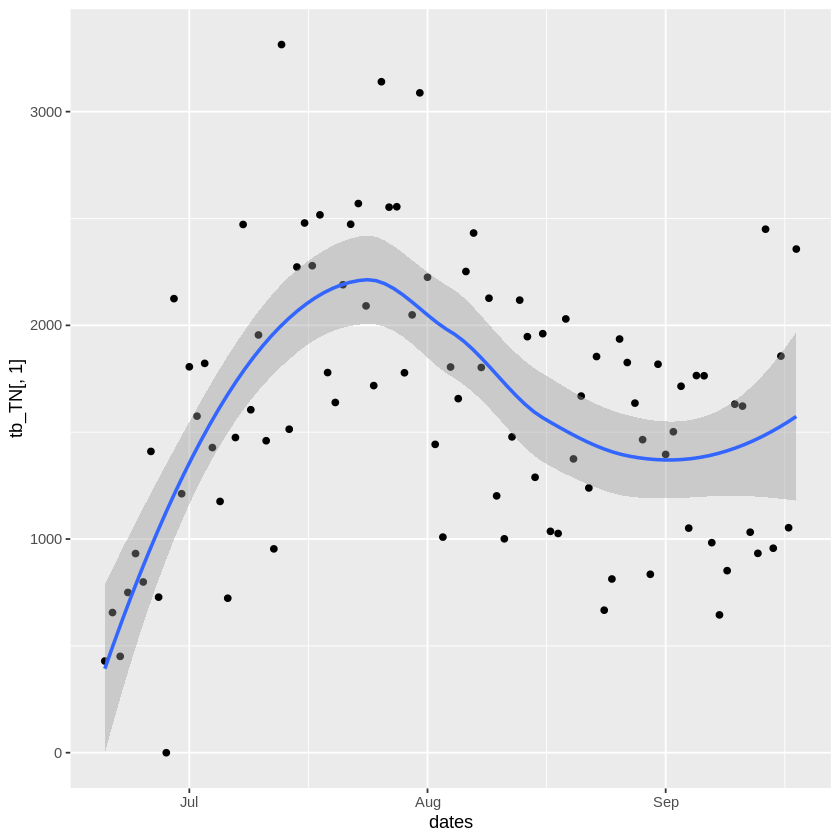

In [ ]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [ ]:
days_window = 90 #90-day window
endday = today(tzone='Est') -1

tb_2States <- tb3 %>% 
  dplyr::select( 'Tennessee','Georgia', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_2States)

Warning message in with_tz(Sys.time(), tzone):
“Unrecognized time zone 'Est'”


,Tennessee,Georgia,dates
,<dbl>,<dbl>,<date>
6/25/20,799,1714,2020-06-25
6/26/20,1410,1900,2020-06-26
6/27/20,728,1990,2020-06-27
6/28/20,0,2225,2020-06-28
6/29/20,2125,2207,2020-06-29
6/30/20,1212,1874,2020-06-30


In [ ]:
library(reshape2)

In [ ]:
df_tmp <- melt(tb_2States, measure.vars = c('Tennessee', 'Georgia'))
head(df_tmp)

,dates,variable,value
,<date>,<fct>,<dbl>
1,2020-06-25,Tennessee,799
2,2020-06-26,Tennessee,1410
3,2020-06-27,Tennessee,728
4,2020-06-28,Tennessee,0
5,2020-06-29,Tennessee,2125
6,2020-06-30,Tennessee,1212


In [ ]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-06-25,Tennessee,799
2,2020-06-26,Tennessee,1410
3,2020-06-27,Tennessee,728
4,2020-06-28,Tennessee,0
5,2020-06-29,Tennessee,2125
6,2020-06-30,Tennessee,1212


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



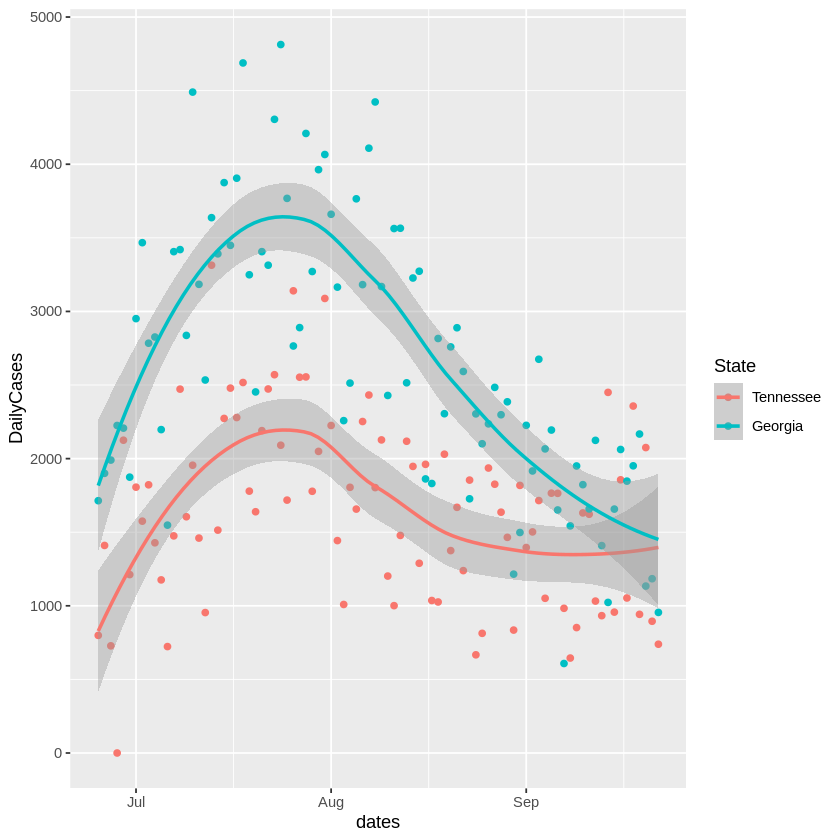

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + geom_smooth()

### How about more than two states? 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


,Tennessee,Georgia,Alabama,Florida,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
6/24/20,932,1571,967,5511,2020-06-24
6/25/20,799,1714,1142,5004,2020-06-25
6/26/20,1410,1900,977,8942,2020-06-26
6/27/20,728,1990,900,9585,2020-06-27
6/28/20,0,2225,358,8530,2020-06-28
6/29/20,2125,2207,1734,5266,2020-06-29


In [ ]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-06-24,Tennessee,932
2,2020-06-25,Tennessee,799
3,2020-06-26,Tennessee,1410
4,2020-06-27,Tennessee,728
5,2020-06-28,Tennessee,0
6,2020-06-29,Tennessee,2125


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


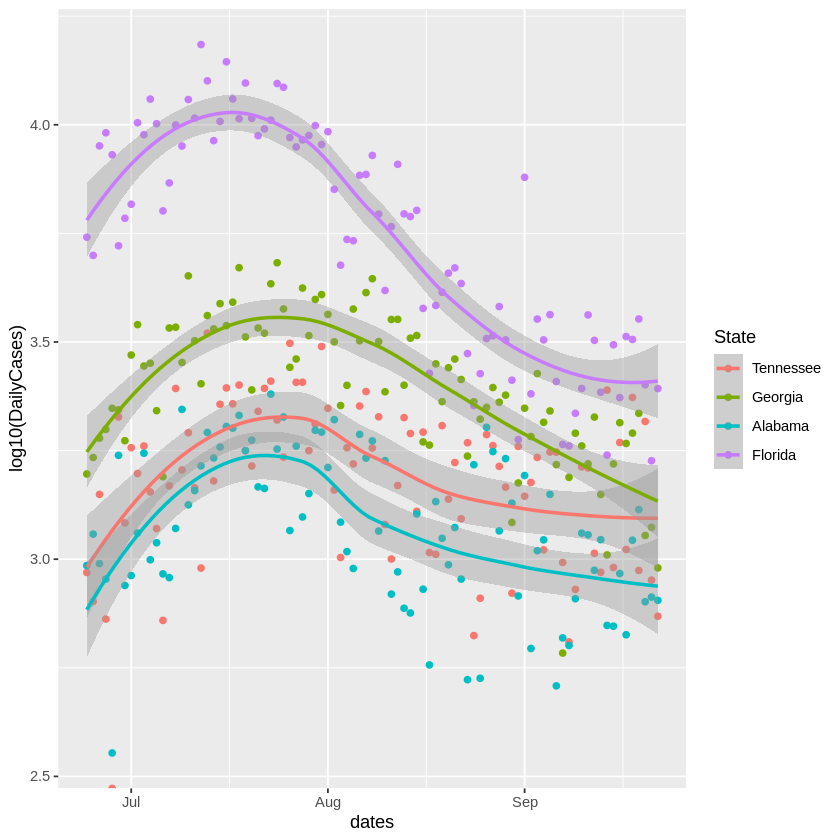

In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Part 3. Transmission analysis

### Study the Germany 1918 exampel

In [ ]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
help(package='R0')

In [ ]:
data(Germany.1918)
head(Germany.1918)

1918-09-29 1918-09-30 1918-10-01 1918-10-02 1918-10-03 1918-10-04 
        10          4          4         19          6         13

In [ ]:
str(Germany.1918)

 Named num [1:126] 10 4 4 19 6 13 28 23 35 27 ...
 - attr(*, "names")= chr [1:126] "1918-09-29" "1918-09-30" "1918-10-01" "1918-10-02" ...


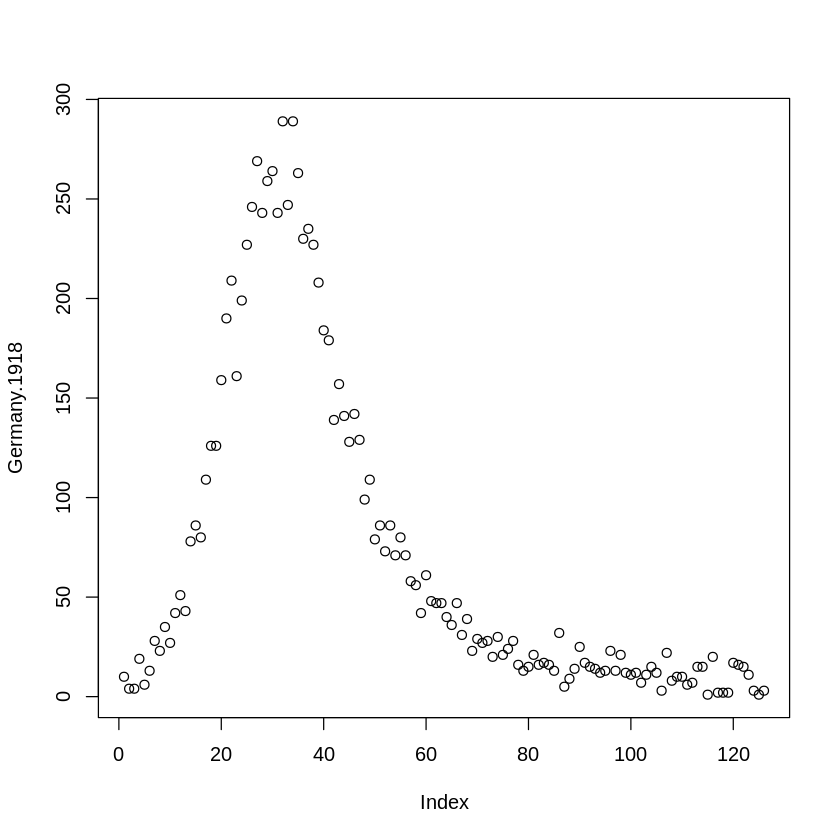

In [ ]:
plot(Germany.1918)


e.R0.T> #Loading package
e.R0.T> library(R0)

e.R0.T> ## Data is taken from the paper by Nishiura for key transmission parameters of an institutional
e.R0.T> ## outbreak during 1918 influenza pandemic in Germany)
e.R0.T> 
e.R0.T> data(Germany.1918)

e.R0.T> mGT<-generation.time("gamma", c(3, 1.5))

e.R0.T> TD <- est.R0.TD(Germany.1918, mGT, begin=1, end=126, nsim=100)


Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Using initial incidence as initial number of cases.”



e.R0.T> # Warning messages:
e.R0.T> # 1: In est.R0.TD(Germany.1918, mGT) : Simulations may take several minutes.
e.R0.T> # 2: In est.R0.TD(Germany.1918, mGT) : Using initial incidence as initial number of cases.
e.R0.T> TD
Reproduction number estimate using  Time-Dependent  method.
2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...


e.R0.T> # Reproduction number estimate using  Time-Dependent  method.
e.R0.T> # 2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...
e.R0.T> 
e.R0.T> ## An interesting way to look at these results is to agregate initial data by longest time unit,
e.R0.T> ## such as weekly incidence. This gives a global overview of the epidemic.
e.R0.T> TD.weekly <- smooth.Rt(TD, 7)

e.R0.T> TD.weekly
Reproduction number estimate using  Time-Dependent  method.
1.878424 1.580976 1.356918 1.131633 0.9615463 0.8118902 0.8045254 0.8395747 0.8542518 0.8258094 ...


e.R0.T> # Reproduction number 

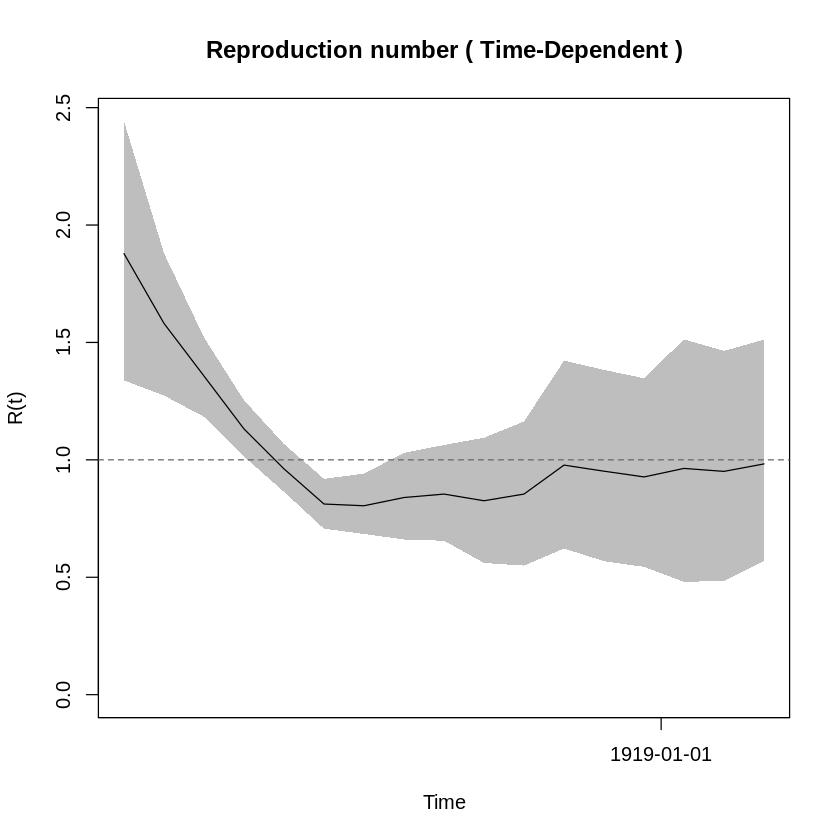

In [ ]:
example(est.R0.TD)

In [ ]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

List of 14
 $ R          : num [1:99] 0 0 2.22 0.66 1.2 1.84 1.43 1.63 1.34 1.52 ...
 $ conf.int   :'data.frame':	99 obs. of  2 variables:
  ..$ CI.lower.: num [1:99] 0.01 0.01 0.97 0.05 0.31 1.11 0.8 1.1 0.85 1.09 ...
  ..$ CI.upper.: num [1:99] 1.62 1.59 3.26 1.63 2.02 2.49 2 2.13 1.79 1.93 ...
 $ proba.Rt   :List of 100
  ..$ : num [1:4601] 0.000217 0.000217 0.000217 0.000217 0.000217 ...
  ..$ : num [1:4601] 0.0152 0.0151 0.0149 0.0148 0.0146 ...
  ..$ : num [1:4601] 0.0136 0.0135 0.0134 0.0133 0.0132 ...
  ..$ : num [1:4601] 2.03e-05 2.13e-05 2.23e-05 2.33e-05 2.44e-05 ...
  ..$ : num [1:4601] 0.00419 0.00428 0.00437 0.00446 0.00455 ...
  ..$ : num [1:4601] 0.000359 0.000378 0.000397 0.000417 0.000438 ...
  ..$ : num [1:4601] 1.32e-07 1.48e-07 1.65e-07 1.85e-07 2.06e-07 ...
  ..$ : num [1:4601] 1.06e-06 1.19e-06 1.34e-06 1.52e-06 1.71e-06 ...
  ..$ : num [1:4601] 1.27e-09 1.53e-09 1.83e-09 2.19e-09 2.63e-09 ...
  ..$ : num [1:4601] 2.00e-08 2.41e-08 2.91e-08 3.51e-08 4.22e-08 ...


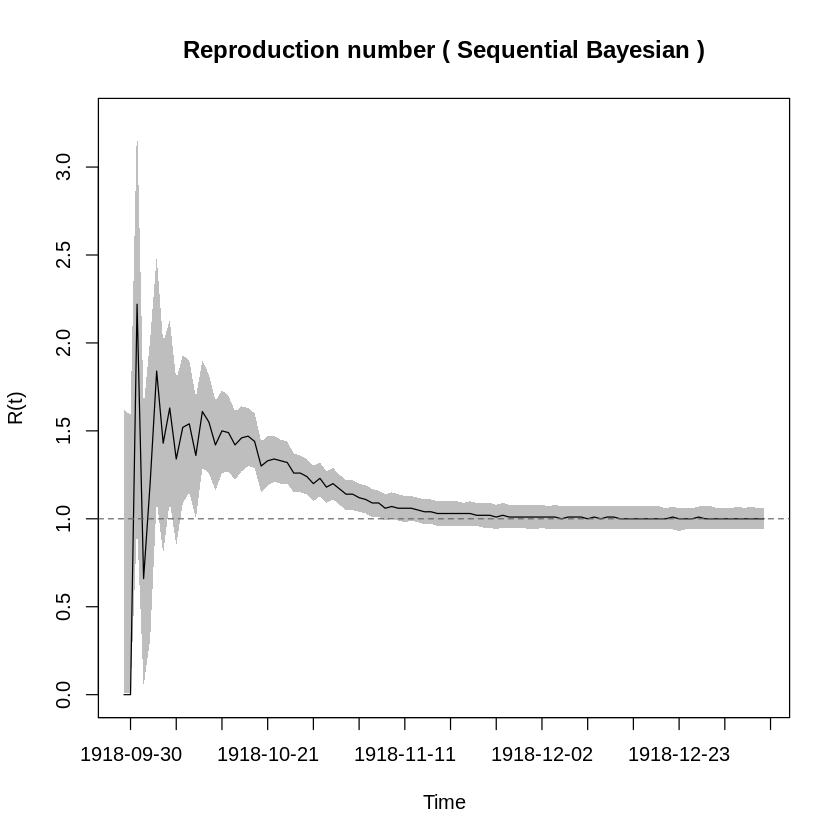

In [ ]:
plot(SB)

### Now, let's estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

,Tennessee,Georgia,Alabama,Florida,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
3/26/20,181,278,136,675,2020-03-26
3/27/20,221,475,70,543,2020-03-27
3/28/20,193,366,107,863,2020-03-28
3/29/20,209,285,131,483,2020-03-29
3/30/20,197,157,74,1227,2020-03-30
3/31/20,474,1121,88,1268,2020-03-31


In [ ]:
length(tb_sub[,1])

[1] 181

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5))
mGT

Discretized Generation Time distribution
mean: 4.999765 , sd: 1.526835 
 [1] 0.0000000000 0.0006003464 0.0240149896 0.1294177453 0.2495603758
 [6] 0.2599966046 0.1807711004 0.0946112317 0.0401491572 0.0145052741
[11] 0.0046144103 0.0013241718 0.0003489722 0.0000856206


In [ ]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=180, nsim=100)

Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 180, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 180, nsim = 100):
“Using initial incidence as initial number of cases.”


In [ ]:
str(TD)

List of 16
 $ R          : Named num [1:180] 5.391 2.392 1.6 0.947 0.705 ...
  ..- attr(*, "names")= chr [1:180] "1" "2" "3" "4" ...
 $ conf.int   :'data.frame':	180 obs. of  2 variables:
  ..$ lower: num [1:180] 5.163 2.217 1.451 0.837 0.609 ...
  ..$ upper: num [1:180] 5.611 2.557 1.762 1.05 0.838 ...
 $ P          : num [1:181, 1:181] 0 0 0 0 0 0 0 0 0 0 ...
 $ p          : num [1:181, 1:181] 0 0 0 0 0 0 0 0 0 0 ...
 $ GT         :List of 4
  ..$ GT  : num [1:14] 0 0.0006 0.024 0.1294 0.2496 ...
  ..$ time: int [1:14] 0 1 2 3 4 5 6 7 8 9 ...
  ..$ mean: num 5
  ..$ sd  : num 1.53
  ..- attr(*, "class")= chr "R0.GT"
 $ epid       :List of 2
  ..$ incid: num [1:181] 181 221 193 209 197 474 542 80 54 255 ...
  ..$ t    : num [1:181] 1 2 3 4 5 6 7 8 9 10 ...
 $ import     : num [1:181] 0 0 0 0 0 0 0 0 0 0 ...
 $ pred       : num [1:180] 181 0.586 23.749 139.155 319.444 ...
 $ begin      : num 1
 $ begin.nb   : int 1
 $ end        : int [1:5] 22 29 57 69 96
 $ end.nb     : int 180
 $ dat

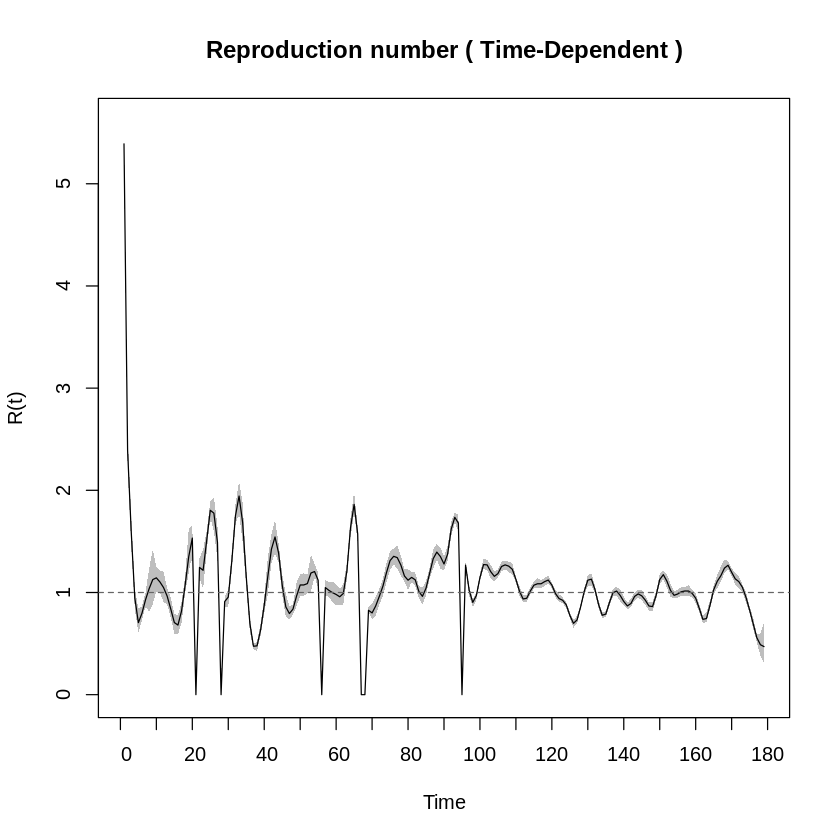

In [ ]:
plot(TD)

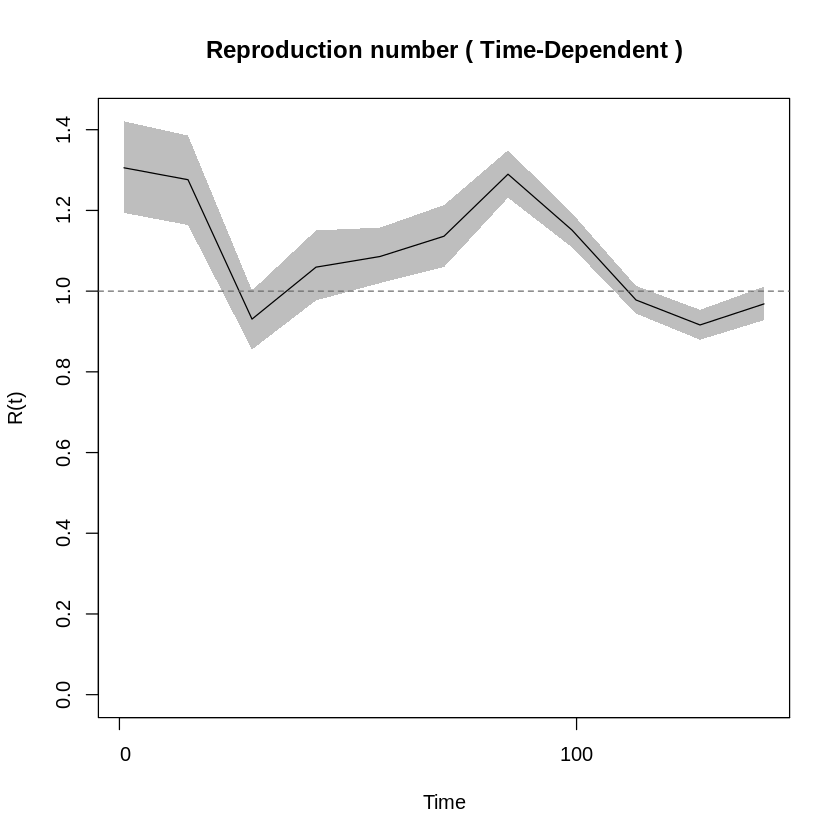

In [ ]:
plot(smooth.Rt(TD,14))

In [ ]:
SB <- est.R0.SB(epid= tb_sub$Tennessee, GT=mGT, begin=1, end=99) #Bayesian approach, but only calcular first 16 days
str(SB)

List of 14
 $ R          : num [1:20] 2 1.15 1.23 1.1 2.28 2.09 0.74 0.69 1.17 1.26 ...
 $ conf.int   :'data.frame':	20 obs. of  2 variables:
  ..$ CI.lower.: num [1:20] 1.32 0.65 0.83 0.75 2.01 1.86 0.52 0.46 0.96 1.07 ...
  ..$ CI.upper.: num [1:20] 2.64 1.62 1.61 1.43 2.55 2.32 0.96 0.91 1.37 1.46 ...
 $ proba.Rt   :List of 21
  ..$ : num [1:212501] 4.71e-06 4.71e-06 4.71e-06 4.71e-06 4.71e-06 ...
  ..$ : num [1:212501] 2.16e-09 2.50e-09 2.89e-09 3.34e-09 3.85e-09 ...
  ..$ : num [1:212501] 6.62e-07 7.83e-07 9.27e-07 1.09e-06 1.29e-06 ...
  ..$ : num [1:212501] 5.55e-10 7.28e-10 9.53e-10 1.24e-09 1.62e-09 ...
  ..$ : num [1:212501] 2.29e-10 3.16e-10 4.35e-10 5.97e-10 8.17e-10 ...
  ..$ : num [1:212501] 6.77e-53 1.75e-52 4.49e-52 1.15e-51 2.94e-51 ...
  ..$ : num [1:212501] 2.45e-63 8.58e-63 2.99e-62 1.04e-61 3.59e-61 ...
  ..$ : num [1:212501] 6.17e-11 1.04e-10 1.75e-10 2.93e-10 4.86e-10 ...
  ..$ : num [1:212501] 6.54e-10 1.08e-09 1.78e-09 2.90e-09 4.69e-09 ...
  ..$ : num [1:21250

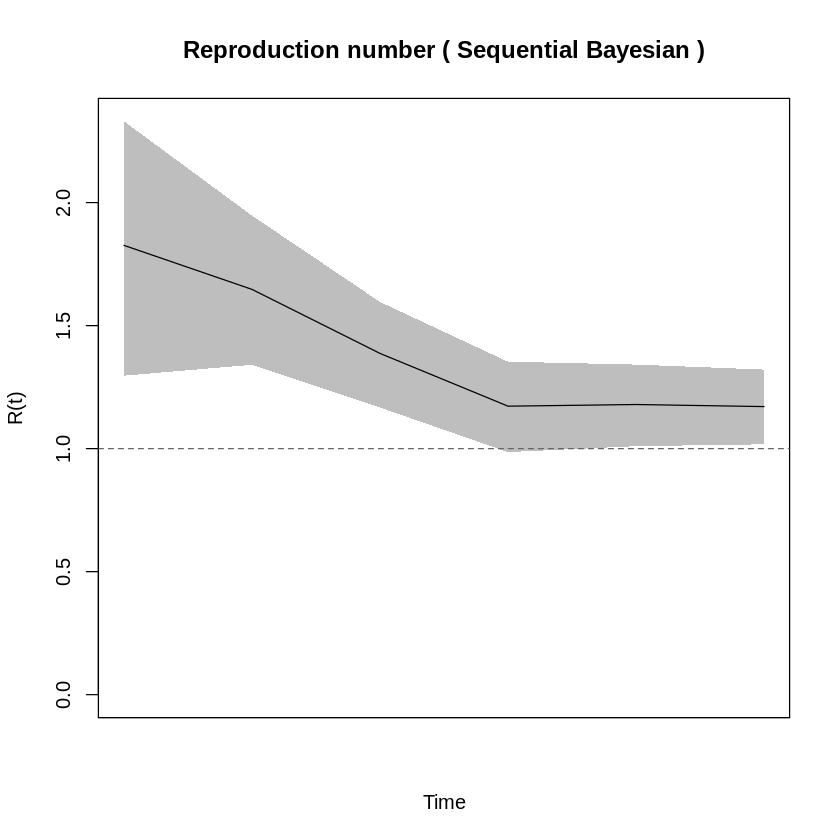

In [ ]:
plot(smooth.Rt(SB, 3))

## How about Hamilton County, TN? 

In [ ]:
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



In [ ]:
window = 175
tb_HCTN <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

tail(tb_HCTN)

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
9/17/20,8899,2020-09-17
9/18/20,8985,2020-09-18
9/19/20,9033,2020-09-19
9/20/20,9106,2020-09-20
9/21/20,9144,2020-09-21
9/22/20,9211,2020-09-22


In [ ]:
TDHamilton <- est.R0.TD(tb_HCTN[,1], mGT, begin=1, end=window, nsim=100)

Warning message in est.R0.TD(tb_HCTN[, 1], mGT, begin = 1, end = window, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tb_HCTN[, 1], mGT, begin = 1, end = window, nsim = 100):
“Using initial incidence as initial number of cases.”


In [ ]:
tb_HCTN$Rt =  TDHamilton$R 

In [ ]:
# remove first and last points that are error prone.
tb_HCTN$Rt[length(tb_HCTN$R)] = NA
tb_HCTN$Rt[1:2]= NA
tail(tb_HCTN)

,"Hamilton, Tennessee, US",dates,Rt
,<dbl>,<date>,<dbl>
9/17/20,8899,2020-09-17,1.028804
9/18/20,8985,2020-09-18,1.029842
9/19/20,9033,2020-09-19,1.030584
9/20/20,9106,2020-09-20,1.031001
9/21/20,9144,2020-09-21,1.031076
9/22/20,9211,2020-09-22,NA


In [ ]:
head(tb_HCTN)

,"Hamilton, Tennessee, US",dates,Rt
,<dbl>,<date>,<dbl>
4/1/20,50,2020-04-01,NA
4/2/20,61,2020-04-02,NA
4/3/20,67,2020-04-03,1.663180
4/4/20,71,2020-04-04,1.460635
4/5/20,74,2020-04-05,1.344330
4/6/20,83,2020-04-06,1.267363


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


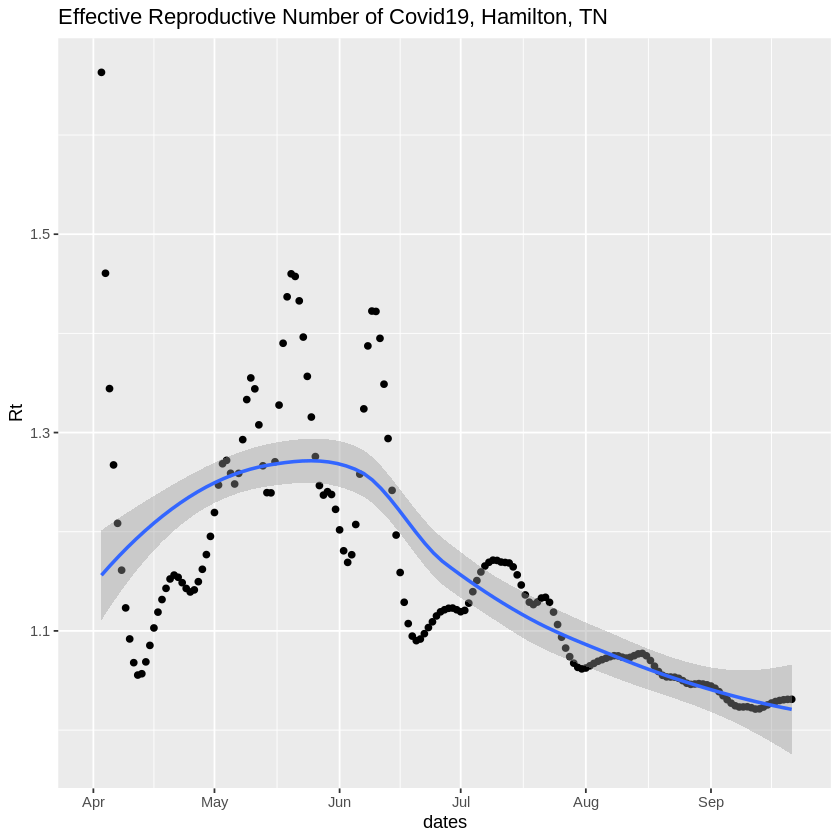

In [ ]:
ggplot(tb_HCTN, aes(x=dates, y=Rt)) +
  geom_point() +
  geom_smooth() +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


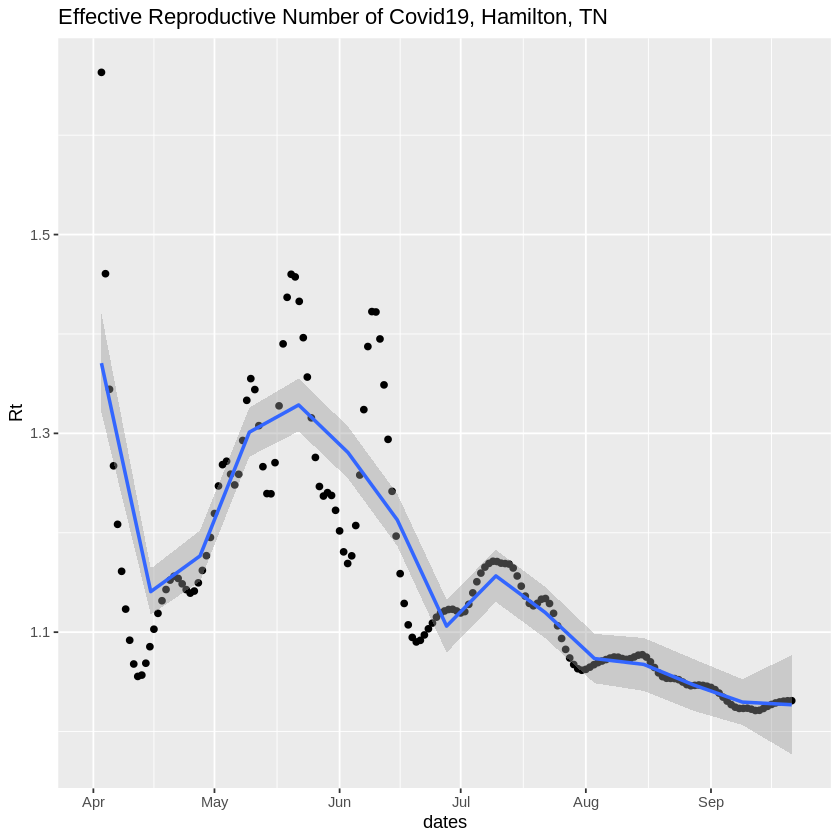

In [ ]:
ggplot(tb_HCTN, aes(x=dates, y=Rt)) +
  geom_point() +
  stat_smooth(n=15, span=0.3) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

# Part 4. Mobility analysis (in progress)


# 

In [ ]:
library(tidyverse)

# read directly from url
tbGM = read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)

Warning message:
“2584995 parsing failures.
 row        col           expected                  actual                                                                  file
1846 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
1847 me

In [ ]:
# get Google Mobility data through wget
system( 'wget https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

In [ ]:
list.files()

[1] "Global_Mobility_Report.csv" "R0"                        
[3] "sample_data"

In [ ]:
tbGM = read_csv('Global_Mobility_Report.csv')
head(tbGM)

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)

Warning message:
“2584995 parsing failures.
 row        col           expected                  actual                         file
1846 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
1847 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
1

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-20,-2,1,6,1,1,1


In [ ]:
tbGM %>% 
 distinct( country_region)

country_region
<chr>
United Arab Emirates
Afghanistan
Antigua and Barbuda
Angola
Argentina
Austria
Australia
Aruba
Bosnia and Herzegovina


In [ ]:
tbGM %>% filter( country_region == "United States")


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,NA,NA,NA,NA,NA,2020-02-15,6,2,15,3,2,-1
US,United States,NA,NA,NA,NA,NA,2020-02-16,7,1,16,2,0,-1
US,United States,NA,NA,NA,NA,NA,2020-02-17,6,0,28,-9,-24,5
US,United States,NA,NA,NA,NA,NA,2020-02-18,0,-1,6,1,0,1
US,United States,NA,NA,NA,NA,NA,2020-02-19,2,0,8,1,1,0
US,United States,NA,NA,NA,NA,NA,2020-02-20,1,0,4,0,0,1
US,United States,NA,NA,NA,NA,NA,2020-02-21,2,-2,4,1,0,0
US,United States,NA,NA,NA,NA,NA,2020-02-22,7,3,23,5,4,-1
US,United States,NA,NA,NA,NA,NA,2020-02-23,7,3,23,5,2,-1


# Sandbox

In [ ]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [ ]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

,m,variable,value
,<fct>,<fct>,<dbl>
1,a,x,1.209237
2,b,x,1.002371
3,c,x,1.288276
4,d,x,1.038451
5,e,x,1.074656
6,f,x,1.295912


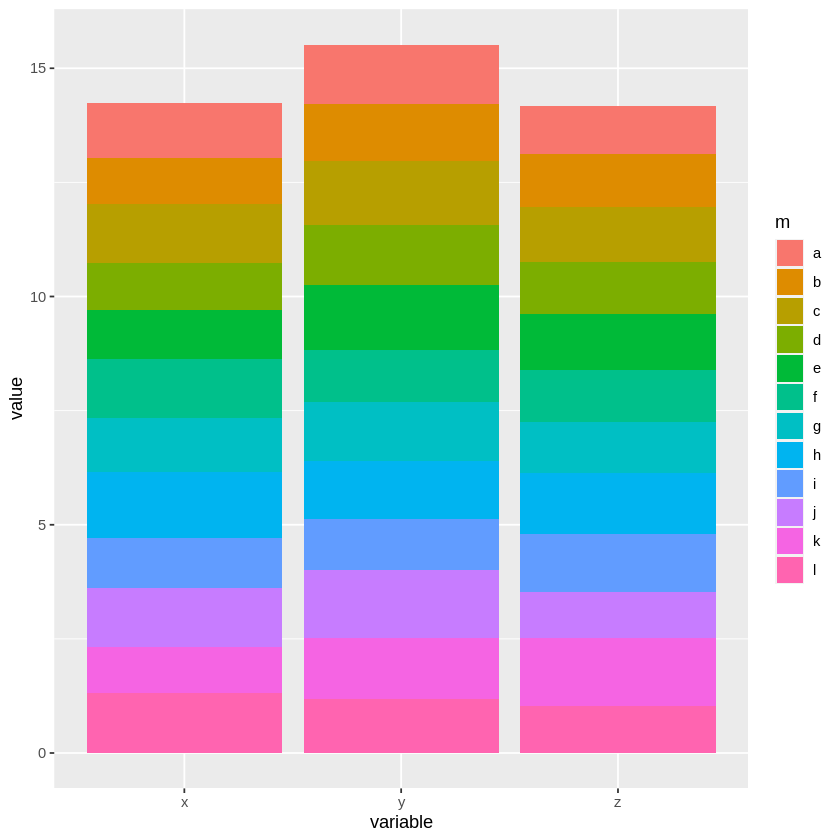

In [ ]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

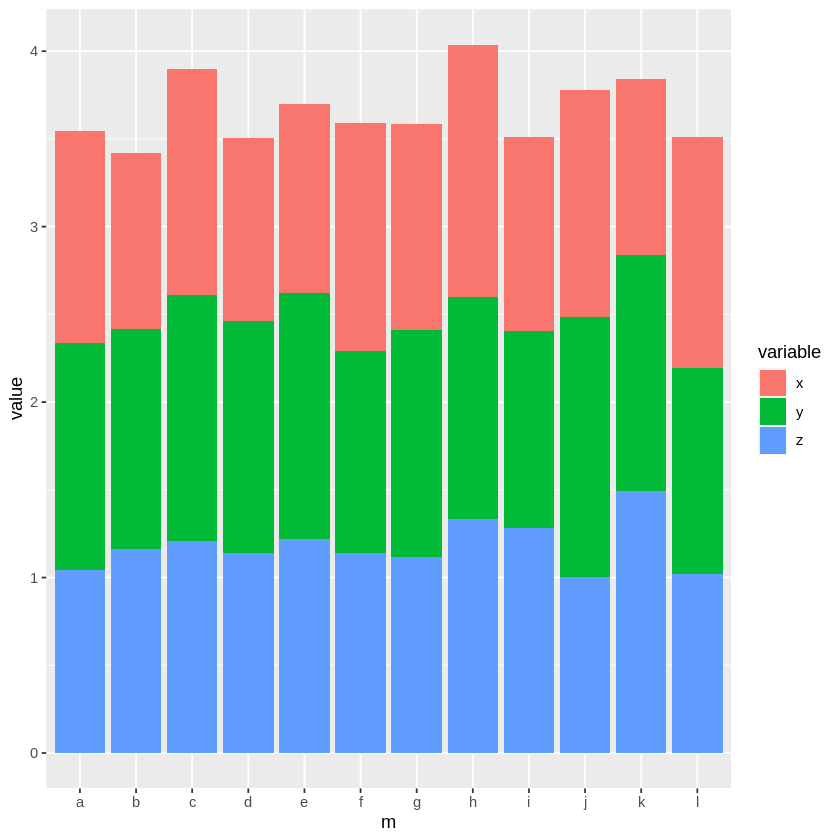

In [ ]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')